# Machine Learning Nanodegree

## Capstone Project

## Gold Rates Prediction using Machine Learning Approach

Historically, gold had been used as a form of currency in various parts of the world including USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. 

Forecasting rise and fall in the daily gold rates, can help investors to decide when to buy (or sell) the commodity. 

We in this project would forecast gold rates using the most comprehensive set of features and would apply various machine learning algorithms for forecasting and compare their results. We also identify the attributes that highly influence the gold rates.

![Gold ETF](Gold.PNG)



## Project Work Flow

I would proceed the project as shown in the below mentioned steps.


![Project Work Flow](pd.png)

## Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil import parser

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

## About Data

Data for this study is collected from **November 18th 2011** to **January 1st 2025** from various sources. The data has **1718** rows in total and **80** columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of  US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered. 

**Attributes:**

**Features**

- Gold ETF :- Date, Open, High, Low, Close and Volume.
- S&P 500 Index :- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume' 
- Dow Jones Index :- 'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume' 
- Eldorado Gold Corporation (EGO) :- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'
- EURO - USD Exchange Rate :- 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend' 
- Brent Crude Oil Futures :- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'
- Crude Oil WTI USD :- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'
- Silver Futures :- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'
- US Bond Rate (10 years) :- 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend' 
- Platinum Price :- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend'
- Palladium Price :- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend' 
- Rhodium Prices :- 'RHO_PRICE' 
- US Dollar Index : 'USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend' 
- Gold Miners ETF :- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume' 
- Oil ETF USO :- 'USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'

**Target Variable**
- Gold ETF :- Adjusted Close

In [50]:
df=pd.read_csv

In [51]:
sentiment_df = pd.read_csv

In [52]:
df_final = pd.read_csv("FINAL_USO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [53]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [54]:
df_final.shape

(1718, 80)

So, we have (1718, 80)records in the dataset and 18 columns including Adjusted Close which is our target variable.

In [55]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

# Checking Missing Values

In [57]:
df_final.isnull().values.any()

False

That's great ! we dont have any missing values in our dataset

In [58]:
print(df_final.isnull().sum())

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64


## Effect of Index prices on gold rates

In [59]:
import pandas as pd

df_final = pd.read_csv('FINAL-USO.csv')  # or your actual file
# Convert the 'Date' column to datetime format
df_final['Date'] = pd.to_datetime(df_final['Date'])

In [60]:
# Set 'Date' as the index
df_final.set_index('Date', inplace=True)

In [61]:
print(df_final.columns)


Index(['USD', 'EUR', 'JPY', 'GBP', 'CAD', 'CHF', 'INR', 'CNY', 'TRY', 'SAR',
       'IDR', 'AED', 'THB', 'VND', 'EGP', 'KRW', 'RUB', 'ZAR', 'AUD'],
      dtype='object')


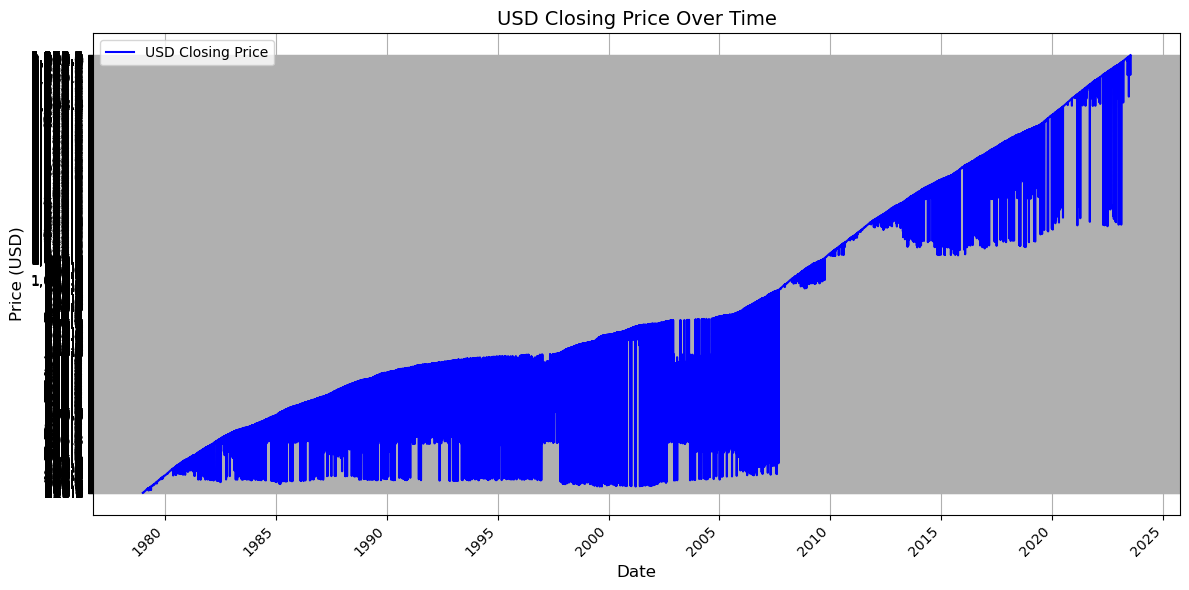

In [62]:
import matplotlib.pyplot as plt

# Plot 'USD' Closing Price over time (assuming 'Date' is the index)
plt.figure(figsize=(12, 6))
plt.plot(df_final.index, df_final['USD'], label='USD Closing Price', color='blue')

# Title and Labels
plt.style.use('seaborn-v0_8-dark-palette')
plt.title('USD Closing Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

# Formatting Date on the x-axis for better readability
plt.xticks(rotation=45, ha='right')  # Rotate dates for better visibility
plt.grid(True)

# Add a legend
plt.legend()

# Adjust layout to make sure everything fits
plt.tight_layout()

# Display the plot
plt.show()


In [65]:
GLD_adj_close = df_final['Adj Close']
SPY_adj_close = df_final['SP_Ajclose']
DJ_adj_close  = df_final['DJ_Ajclose']

df_p = pd.DataFrame({'GLD':GLD_adj_close, 'SPY':SPY_adj_close, 'DJ':DJ_adj_close})

df_ax = df_p.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

KeyError: 'Adj Close'

## Computing Daily Returns of all Features

In [ ]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return


In [ ]:
GLD_adj_close = df_final['Adj Close']
SPY_adj_close = df_final['SP_Ajclose']
DJ_adj_close  = df_final['DJ_Ajclose']
EG_adj_close =  df_final['EG_Ajclose']
USO_Adj_close = df_final['USO_Adj Close']
GDX_Adj_close = df_final['GDX_Adj Close']
EU_price      = df_final['EU_Price']
OF_price      = df_final['OF_Price']
OS_price      = df_final['OS_Price']
SF_price      = df_final['SF_Price']
USB_price      = df_final['USB_Price']
PLT_price      = df_final['PLT_Price']
PLD_price      = df_final['PLD_Price']
rho_price      = df_final['RHO_PRICE']
usdi_price      = df_final['USDI_Price']



GLD_daily_return = compute_daily_returns(GLD_adj_close)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return     = compute_daily_returns(EG_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         =compute_daily_returns(OF_price)
OS_price         =compute_daily_returns(OS_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)
rho_price         =compute_daily_returns(rho_price)
USDI_price         =compute_daily_returns(usdi_price)

df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return, 'USO':USO_Adj_return,
                  'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
                  'RHO':rho_price,'USDI':USDI_price})

daily_ax = df_d[-100:].plot(title='Last 100 records of daily return of all features',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

## Computing daily returns of stock indexes

In [66]:
df_s = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return})

daily_ax = df_s[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

NameError: name 'GLD_daily_return' is not defined

## Scatterplot

In [ ]:
df_d.plot(kind='scatter', x='SPY', y='GLD')

In [ ]:
df_d.plot(kind='scatter', x='DJ', y='GLD')

In [ ]:
df_d.plot(kind='scatter', x='EG', y='GLD')

In [ ]:
df_d.plot(kind='scatter', x='USO', y='GLD')

In [ ]:
df_d.plot(kind='scatter', x='USB', y='GLD')

In [ ]:
df_d.plot(kind='scatter', x='EU', y='GLD')

In [ ]:
df_d.plot(kind='scatter', x='PLT', y='GLD')

In [ ]:
df_d.plot(kind='scatter', x='PLD', y='GLD')

## Statistical Measures (Mean, Standard deviation, Kurtosis)

**Kurtosis** is a statistical measure that is used to describe the distribution. Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that is generally less extreme than the tails of the normal distribution.


For investors, high kurtosis of the return distribution implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as **kurtosis risk**.

**Positive Kurtosis**
More weights in the tail

![Positive](pos.png)

**Negative Kurtosis**
It has as much data in each tail as it does in the peak.

![Negative](neg.png)

In [ ]:
# computing mean,standard deviation and kurtosis of Gold ETF daily return

mean=df_d['GLD'].mean()
# computing standard deviation of Gold stock
std=df_d['GLD'].std()
kurt=df_d['GLD'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['GLD'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

In [ ]:
# computing mean,standard deviation and kurtosis of S&P 500 Index daily return

mean=df_d['SPY'].mean()
# computing standard deviation of Gold stock
std=df_d['SPY'].std()
kurt=df_d['SPY'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['SPY'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of SPY Prices")
plt.show()

In [ ]:
# computing mean,standard deviation and kurtosis of Dow Jones Index daily return
mean=df_d['DJ'].mean()
# computing standard deviation of Gold stock
std=df_d['DJ'].std()
kurt=df_d['DJ'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['DJ'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Dow jones Prices")
plt.show()

## Correlation Analysis

### Plotting Correlation Matrix

In [ ]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_final.corr(), annot=True) 

In [ ]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

In [ ]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [ ]:
corr_matrix=df_final.corr()
coef=corr_matrix["Adj Close"].sort_values(ascending=False)

### Positively Correlated Variables

In [ ]:
pos_corr=coef[coef>0]
pos_corr

### Negatively Correlated Variables

In [ ]:
neg_corr=coef[coef<0]
neg_corr

## Technical Indicators

I will also use following technical indicators which I feel help as a feature for prediction of Gold price

**1. MACD :** The moving average convergence-divergence (MACD) is one of the most powerful and well-known indicators in technical analysis. The indicator is comprised of two exponential moving averages that help measure momentum in a security. The MACD is simply the difference between these two moving averages plotted against a centerline, where the centerline is the point at which the two moving averages are equal.

**2. RSI :** The relative strength index (RSI) is another well known momentum indicators that’s widely used in technical analysis. The indicator is commonly used to identify overbought and oversold conditions in a security with a range between 0 (oversold) and 100 (overbought).

**3. Simple Moving Average (SMA) :** simply takes the sum of all of the past closing prices over a time period and divides the result by the total number of prices used in the calculation. For example, a 10-day simple moving average takes the last ten closing prices and divides them by ten.

**4. Upper Band**

**5. Lower Band**

**6. DIFF**

**7. Open-Close**

**8. High-Low**

In [ ]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

## Plotting Technical Indicators

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=df_final.Open - df_final.Close

High_Low=df_final.High-df_final.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close=df_final.Open - df_final.Close
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=df_final.High-df_final.Low
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')




axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')


In [ ]:
test = df_final
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close']=Open_Close
test['High_Low']=High_Low


# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])


display(test.head())

In [ ]:
df_final.columns

In this step I would segregate feature and target variables. I will not use Close feature of GLD ETF and will use Adjusted Close of Gold ETF as target variable 

In [ ]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume','SP_open','SP_high','SP_low','SP_Ajclose','SP_volume','DJ_open','DJ_high', 'DJ_low',  'DJ_Ajclose', 'DJ_volume', 'EG_open','EG_high', 'EG_low',  
                   'EG_Ajclose', 'EG_volume', 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price','OF_Open','OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open','OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
                   'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
                    'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
                     'USDI_Low', 'USDI_Volume', 'USDI_Trend','GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume','SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD','RSI','STDEV','Open_Close', 'High_Low']



## Normalizing the data

In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

In [ ]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

## Train Test Split

In this step we would perform Train test split using sklearn's Timeseries split

In [ ]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
       

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

## Model Building

### 1. Benchmark Model :
       I will use Decision Tree Regressor with default parameter as my Benchmark model for the project.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

## Solution Model 

### Support Vector Regressor (SVR)

In [ ]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')


### Hyperparameter Tuning
In this step I will tune two parameters of SVR C and epsilon to see if the model shows any improvement.

In [ ]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')


As we have seen using gridsearch on SVR we get significant improvement in R2 score and RMSE also came down so we will save this as our first solution model 

In [ ]:

solution_models['SVR All Feat'] = lsvr_grid_search_feat

## Solution Model : Random Forest

In [ ]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

## Hyper parameter Tuning
In this I will tune 3 parameters of Random forest which are n_estimators,max_features,max_depth

In [ ]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

grid_search_RF_feat.fit(X_train, y_train)


In [ ]:
print(grid_search_RF_feat.best_params_)
validate_result(grid_search_RF_feat,'RandomForest GS')

As we have seen, Random forest with default parameters performed better than tuned Random forest model.So, we will include random forest with default parameters as our second solution model.

In [ ]:
solution_models['Random_Forest with Feat'] = random_forest_clf_feat

## Solution Model : Lasso and Ridge

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

## Solution Model : Bayesian Ridge

In [ ]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

## Solution Model : Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')
solution_models['GB All Feat'] = GB_feat

## Solution Model : Stochastic Gradient Descent (SGD)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

## Model Review
In this step, we will review benchmark model and all the solution model based on evaluation metrics i.e, RMSE and R2 score

In [ ]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

           
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)

### Comparison of RMSE of Benchmark and all Solution Models

In [ ]:

model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:8]]
values = model_values[indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(8), values ,width = 0.6, align="center", color = '#ff00c1')
plt.xticks(np.arange(8), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()

## Feature Selection

In this step we will select supporting features using sklearn's **SelectFromModel** library using Lasso regressor as it has lowest RMSE.

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(lasso_clf_feat)
sfm.fit(feature_minmax_transform, target_adj_close.values.ravel())
display(feature_minmax_transform.head())
sup = sfm.get_support()
zipped = zip(feature_minmax_transform,sup)
print(*zipped)

In [ ]:
# Selecting Features which supports Model building process

feature_selected = feature_minmax_transform[['Open','High','Low','OF_Trend','USB_Trend','PLT_Trend','USDI_Price','GDX_Close','SMA','Upper_band','RSI','Open_Close']]
feature_selected_validation_X = validation_X[['Open','High','Low','OF_Trend','USB_Trend','PLT_Trend','USDI_Price','GDX_Close','SMA','Upper_band','RSI','Open_Close']]
display(feature_selected.head())
display(feature_selected_validation_X.head())

## Train Test Split

In [ ]:
for train_index, test_index in ts_split.split(feature_selected):
        X_train, X_test = feature_selected[:len(train_index)], feature_selected[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
     

## validation Feature Selected Benchmark & Solution Model

In [ ]:
def feature_selected_validate_result(model, model_name):
    predicted = model.predict(feature_selected_validation_X)
    
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    R2_score = r2_score(validation_y, predicted)
    
    print(model_name + '\n')
    print('RMSE: ', RSME_score)
    print('R2 score: ', R2_score)
    print('----------------------')


print('---------Benchmark-------------')  
dt = DecisionTreeRegressor(random_state=0)
benchmark_dt_fs = dt.fit(X_train,y_train)
feature_selected_validate_result(benchmark_dt_fs, 'Decision Tree')

feature_selected_solution_models = {}
 
print('--------Solution Models--------------')  
# Random Forest
random_forest_clf_fs = RandomForestRegressor(random_state=0,
                                             max_depth=3,
                                             max_features='auto',
                                             n_estimators=10
)
random_forest_parameters = {
    'n_estimators':[10, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[3, 5, 7],
}
grid_search_RF_fs = GridSearchCV(estimator=random_forest_clf_fs,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)
grid_search_RF_fs.fit(X_train, y_train)
feature_selected_validate_result(grid_search_RF_fs,'Feature selected RandomForest GS')
feature_selected_solution_models['FS_RandomForest'] = grid_search_RF_fs

# Linear SVR
linear_svr_fs = SVR(
                          C=50.0,
                          epsilon=0,kernel='linear')
linear_svr_clf_fs = linear_svr_fs.fit(X_train,y_train)
feature_selected_validate_result(linear_svr_clf_fs,'Feature selected LSVR')
feature_selected_solution_models['FS_LSVR'] = linear_svr_clf_fs


# lasso
lasso_fs = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
lasso_clf_fs = lasso_fs.fit(X_train,y_train)
feature_selected_validate_result(lasso_clf_fs,'Feature selected LassoCV')
feature_selected_solution_models['FS_Lasso'] = lasso_clf_fs

# Ridge
ridge_fs = RidgeCV(gcv_mode='auto')
ridge_clf_fs = ridge_fs.fit(X_train,y_train)
feature_selected_validate_result(ridge_clf_fs,'Feature selected RidgeCV')
feature_selected_solution_models['FS_RidgeCV'] = ridge_clf_fs

# bayesian ridge
bay = linear_model.BayesianRidge()
bay_feat_fs = bay.fit(X_train,y_train)
feature_selected_validate_result(bay_feat_fs,'Feature selected BayRidge')
feature_selected_solution_models['Bay_Ridge'] = bay_feat_fs

#Gradient Boosting
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_fs = regr.fit(X_train,y_train)
feature_selected_validate_result(GB_fs,'Feature selected GB')
feature_selected_solution_models['GB_FS'] = GB_fs

#SGD

sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_fs = sgd.fit(X_train,y_train)
feature_selected_validate_result(sgd_fs,'Feature selected SGD')
feature_selected_solution_models['sgd_fs'] = sgd_fs


## Model Review

In [ ]:
FS_RMSE_scores = {}

def fs_model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_dt_predicted = benchmark_dt_fs.predict(feature_selected_validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_dt_predicted))
    FS_RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_dt_predicted,'y', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(feature_selected_validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

        R2_score = r2_score(validation_y, predicted)
    
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'y', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        FS_RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

fs_model_review(feature_selected_solution_models)

### Comparison of RMSE of Feature selected models and Original Features model

In [ ]:

fs_model_names = []
fs_model_values = []
for name, value in FS_RMSE_scores.items():
    fs_model_names.append(name)
    fs_model_values.append(value)

fs_model_values = np.array(fs_model_values)
fs_model_names = np.array(fs_model_names)

fs_indices = np.argsort(fs_model_values)
fs_columns = fs_model_names[fs_indices[:8]]
fs_values = fs_model_values[fs_indices][:8]
origin_values = model_values[fs_indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(8) - 0.2 , origin_values ,width = 0.4, align="center", color = '#b2b2ff', label = "Original")
plt.bar(np.arange(8), fs_values ,width = 0.4, align="center", color = '#3232ff', label = "Feature Selected")
plt.xticks(np.arange(8), fs_columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare after feature selection')
plt.legend(loc = 'upper center')
plt.show()


**As we have seen from the above plot 3 Feature selected models performs better in RMSE error reduction and Feature selected Linear SVR is the best as it has RMSE of 0.716 in feature selected model and 0.741 with all features model. Also Lasso cv and Bayesian Ridge performs slightly better from original features model where as Ridge cv shows no improvement from features model.Where as four model performance degrades  after feature selection in which benchmark model has highest RMSE error and SGD model degrades most in comparison to others.**

# Ensemble Solution

So now we will ensemble top three performing models i.e, in case of all the features model Lasso,Bayesian ridge and Ridge are the best performing models so we will ensemble these three models while in case of feature selected models we will combine Lasso,Bayesian Ridge and Linear SVR and will compare all the feature ensemble models with feature selected ensemble models.

In [ ]:
# Choosing the top three performing models to ensemble them
ensemble_solution_models = [lasso_clf_feat, bay_feat, ridge_clf_feat]
class EnsembleSolution:
    models = []
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        for i in self.models:
            i.fit(X, y)
    def predict(self, X):
        result = 0
        for i in self.models:
            result = result + i.predict(X)
        
        result = result / len(self.models)
        
        return result

In [ ]:
print("Ensemble Solution Model with Original features")
EnsembleModel = EnsembleSolution(ensemble_solution_models)
validate_result(EnsembleModel,'EnsembleSolution')

Ensemble solution with all features shows best result (with RMSE 0.699 and R2 score of 0.887) in comparison with other solution models.

In [ ]:
ensemble_solution_model_fs = [lasso_clf_fs,bay_feat_fs,linear_svr_clf_fs]

print("Ensemble Solution Model with Selected features")
EnsembleModel_fs = EnsembleSolution(ensemble_solution_model_fs)
feature_selected_validate_result(EnsembleModel_fs,'EnsembleSolution with FS')


Ensemble solution with feature selection has better solution (RMSE 0.711 and  R2score 0.884 ) but Lasso has best performance (RMSE - 0.709 and R2 score 0.884)

## Train Model Multiple Times
By the train_reg_multipletimes function.This function would train the model several times (I choosed 7 times ), and use different parameters on TimeSeriesSplit in each time, average the R2 and RMSE.
I will apply this function on Benchmark model and on top performing solution models with all features which are Linear SVR, Lasso, Ridge and Bayesian ridge and compare the same.

In [ ]:
def train_reg_multipletimes(model, times):
    total_rmse = 0
    total_r2 = 0
    for i in range(times):
        reg = model
        for train_index, test_index in TimeSeriesSplit(n_splits=i+2).split(feature_minmax_transform):
            X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
            y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
            reg.fit(X_train, y_train)
        predicted = reg.predict(validation_X)
        rmse, r2 = print_result(validation_y, predicted, [0,len(validation_y)])
        total_rmse += rmse
        total_r2 += r2
    return total_rmse / times, total_r2 / times

def print_result(actual, predict, index):
    RMSE_score = np.sqrt(mean_squared_error(actual, predict))
    print('From {} to {}'.format(index[0],index[-1]))
    print('RMSE: ', RMSE_score)
    R2_score = r2_score(actual, predict)
    print('R2 score: ', R2_score)
    print('---------------------')
    return RMSE_score, R2_score

In [ ]:
print('Benchmark')
t_multiple_benchmark_RMSE,t_multiple_benchmark_R2 = train_reg_multipletimes(benchmark_dt, 7)
print('RMSE: {} //  R2: {}\n'.format(t_multiple_benchmark_RMSE, t_multiple_benchmark_R2))


In [ ]:
print('LSVR')
t_multiple_LSVR_RMSE,t_multiple_LSVR_R2 = train_reg_multipletimes(linear_svr_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_LSVR_RMSE, t_multiple_LSVR_R2))

In [ ]:
print('Lasso')
t_multiple_lasso_RMSE,t_multiple_lasso_R2 = train_reg_multipletimes(lasso_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_lasso_RMSE, t_multiple_lasso_R2))

In [ ]:
print('Ridge')
t_multiple_ridge_RMSE,t_multiple_ridge_R2 = train_reg_multipletimes(ridge_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_ridge_RMSE, t_multiple_ridge_R2))

In [ ]:
print('BayRidge')
t_multiple_bayridge_RMSE,t_multiple_bayridge_R2 = train_reg_multipletimes(bay_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_bayridge_RMSE, t_multiple_bayridge_R2))

In [ ]:
print('Ensemble')
t_multiple_ensemble_RMSE,t_multiple_ensemble_R2 = train_reg_multipletimes(EnsembleSolution(ensemble_solution_models), 7)
print(' RMSE: {} //  R2: {}\n'.format(t_multiple_ensemble_RMSE, t_multiple_ensemble_R2))

In [ ]:
def cross_validate(model, ts_split):
    clf = model
    total_rmse = 0
    total_r2 = 0
    count = 0
    for train_index, test_index in ts_split.split(validation_X):
        X_test1, X_test2 = validation_X[:len(train_index)], validation_X[len(train_index): (len(train_index)+len(test_index))]
        y_test1, y_test2 = validation_y[:len(train_index)].values.ravel(), validation_y[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        predicted_test1 = clf.predict(X_test1)
        temp1_RMSE, temp1_R2 = print_result(y_test1, predicted_test1, train_index)

        predicted_test2 = clf.predict(X_test2)
        temp2_RMSE, temp2_R2 = print_result(y_test2, predicted_test2, test_index)
        
        total_rmse += temp1_RMSE + temp2_RMSE
        total_r2 += temp1_R2 + temp2_R2
        count += 2
    return total_rmse / count, total_r2 / count



# Cross Validation

In [ ]:
timeseries_cv = TimeSeriesSplit(n_splits=10)
test_bench__RMSE, test_bench_R2 = cross_validate(benchmark_dt,timeseries_cv)

In [ ]:
test_lsvr__RMSE, test_lsvr_R2 = cross_validate(lsvr_grid_search_feat,timeseries_cv)

In [ ]:
test_ridge__RMSE, test_ridge_R2 = cross_validate(ridge_clf_feat,timeseries_cv)

In [ ]:
test_lasso__RMSE, test_lasso_R2 = cross_validate(lasso_clf_feat,timeseries_cv)

In [ ]:
test_bay_RMSE, test_bay_R2 = cross_validate(bay_feat,timeseries_cv)

In [ ]:
test_ensemble_RMSE, test_ensemble_R2 = cross_validate(EnsembleSolution(ensemble_solution_models),timeseries_cv)

In [ ]:
print('Benchmark RMSE: {} // Benchmark R2: {}'.format(test_bench__RMSE, test_bench_R2))
print('LSVR RMSE: {} // LSVR R2: {}'.format(test_lsvr__RMSE, test_lsvr_R2))
print('Lasso RMSE: {} // Lasso R2: {}'.format(test_lasso__RMSE, test_lasso_R2))
print('bayesian ridge RMSE: {} // Bayesian ridge R2: {}'.format(test_bay_RMSE, test_bay_R2))

print('Ensemble RMSE: {} // Ensemble R2: {}'.format(test_ensemble_RMSE, test_ensemble_R2))